In [15]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Checking null values

In [191]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

conclusion:: No nulls present in dataset

## Checking data type of each column

In [192]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

conclusion:: Sex column is of object type so need to encode it using ordinal encoder.

## Encoding sex column

In [3]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Sex']])
df['Sex']=df1
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Visualizing relationship between features and labels

In [ ]:
# for column Sex
a=sns.scatterplot(x=df['Sex'],y=df['Rings'],data=df)
plt.xlabel('Sex')
plt.ylabel('Rings')
plt.show()

conclusion:: Sex is a FEMALE if rings are between 5 and 26. Sex is INFANT if rings are in between 1 to 22. Sex is MALE if rings are in between 3 to 27.
        We could also observe that rings in females are more than that of males and infants.

In [ ]:
# for column Length
a=sns.scatterplot(x=df['Length'],y=df['Rings'],data=df)
plt.xlabel('Length')
plt.ylabel('Rings')
plt.show()

conclusion:: There is linear relation between length and rings, if length increases then number of rings also increase.

In [ ]:
# for column Diameter
a=sns.scatterplot(x=df['Diameter'],y=df['Rings'],data=df)
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.show()

conclusion:: There is linear relation between diameter and rings, if diameter increases then number of rings also increase.

In [ ]:
# for column Height
a=sns.scatterplot(x=df['Height'],y=df['Rings'],data=df)
plt.xlabel('Height')
plt.ylabel('Rings')
plt.show()

conclusion:: Irrespective of number of rings, the height of abalone is always in a range between 0.0 to 0.2.

In [ ]:
# for column Whole weight
a=sns.scatterplot(x=df['Whole weight'],y=df['Rings'],data=df)
plt.xlabel('Whole weight')
plt.ylabel('Rings')
plt.show()

conclusion:: Weight is approx 0.0 to 0.1 if number of rings are in range 1 to 5. as number of rings increases after 5, weight also increases.

In [ ]:
# for column Shucked weight
a=sns.scatterplot(x=df['Shucked weight'],y=df['Rings'],data=df)
plt.xlabel('Shucked weight')
plt.ylabel('Rings')
plt.show()

conclusion:: Weight is approx 0.0 to 0.1 if number of rings are in range 1 to 5. Rings between 10 and 14 has the maximum shucked weight.

In [ ]:
# for column Viscera weight
a=sns.scatterplot(x=df['Viscera weight'],y=df['Rings'],data=df)
plt.xlabel('Viscera weight')
plt.ylabel('Rings')
plt.show()

conclusion:: Weight is approx 0.0 to 0.1 if number of rings are in range 1 to 5. as number of rings increases after 5, Viscera weight also increases.

In [ ]:
# for column Shell weight
a=sns.scatterplot(x=df['Shell weight'],y=df['Rings'],data=df)
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.show()

conclusion:: Weight is approx 0.0 to 0.1 if number of rings are in range 1 to 5. As number of rings increases after 5, shell weight also increases.

## Describing dataset

In [ ]:
df.describe()

conclusion:: there is some kind of skewness present in height, whole weight, shucked weight, viscera weight, shell weight.

## Correlation between features and labels

In [ ]:
df.corr().abs()

<AxesSubplot:>

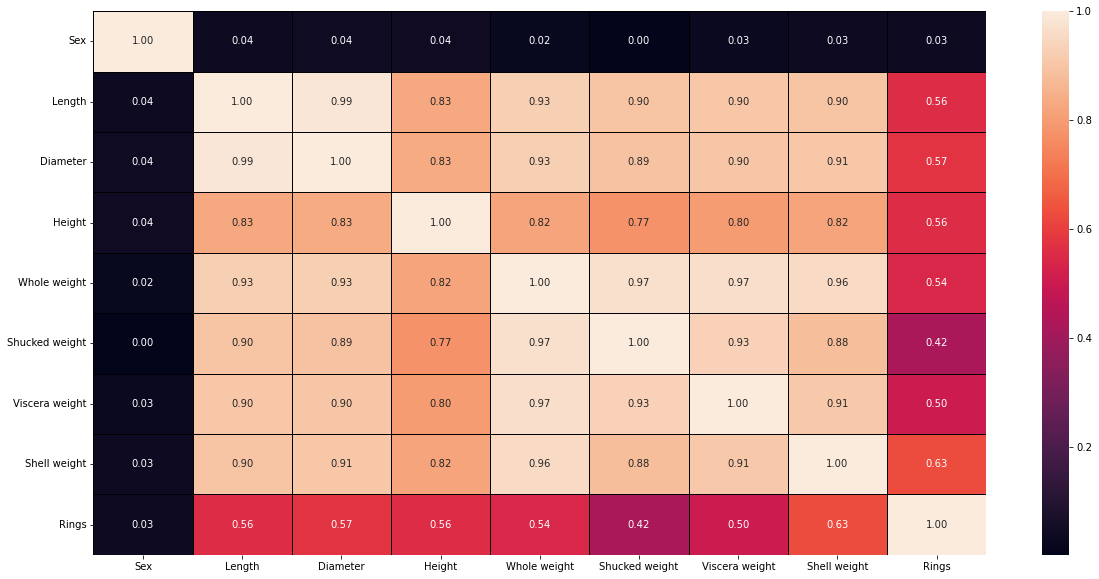

In [194]:
#Plotting heatmap to visualize correlation in a better way
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


conclusion:: We can observe that multicollinearity exists between many features so we will get sure of it by using VIF.

## Checking outliers

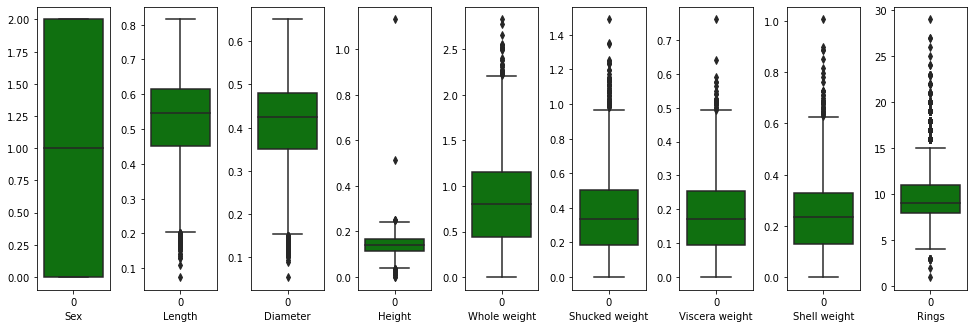

In [195]:
col=df.columns
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(20,20,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i])
    plt.tight_layout()

conclusion:: Outliers are present in all the features.

## Checking Skewness

In [ ]:
df.skew()

conclusion:: Considering the range of skewness to be (-0.5,0.5), all the continuous features are skewed.

## Checking skewness using dist plot

<AxesSubplot:xlabel='Length', ylabel='Density'>

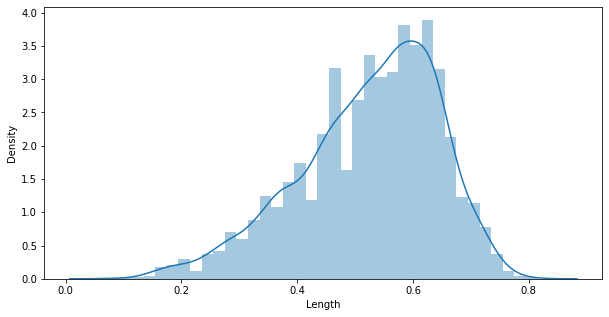

In [196]:
import warnings
warnings.filterwarnings('ignore')

# for feature Length
plt.figure(figsize=(10,5))
sns.distplot(df['Length'])

conclusion:: It is slightly left skewed.

In [ ]:
# for feature Diameter
plt.figure(figsize=(10,5))
sns.distplot(df['Diameter'])

conclusion:: It is slightly left skewed

In [ ]:
# for feature Height
plt.figure(figsize=(10,5))
sns.distplot(df['Height'])

conclusion:: It is too much skewed towards right.

In [ ]:
# for feature Whole weight
plt.figure(figsize=(10,5))
sns.distplot(df['Whole weight'])

conclusion:: It is also skewed towards right.

In [ ]:
# for feature Shucked weight
plt.figure(figsize=(10,5))
sns.distplot(df['Shucked weight'])

conclusion:: It is also skewed towards right.

In [ ]:
# for feature Viscera weight
plt.figure(figsize=(10,5))
sns.distplot(df['Viscera weight'])

conclusion:: It is also skewed towards right.

In [ ]:
# for feature Shell weight
plt.figure(figsize=(10,5))
sns.distplot(df['Shell weight'])

conclusion:: It is also skewed towards right.

## Treating outliers using z-score

In [4]:
#Getting sure of outliers using z score

df_z=df.drop(['Rings'],axis=1)
z=np.abs(zscore(df_z))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {2051, 526, 3599, 1048, 1051, 1052, 2090, 3628, 4145, 4148, 2108, 2623, 2624, 2625, 2114, 3148, 3149, 3151, 81, 2157, 2161, 3188, 129, 3713, 3715, 2709, 2710, 2208, 163, 164, 165, 166, 168, 1193, 170, 1197, 1199, 1202, 1204, 694, 1206, 696, 1207, 1209, 719, 720, 3800, 1754, 1756, 1757, 1759, 1761, 1762, 1763, 2274, 1257, 236, 237, 238, 239, 2810, 2811, 3837, 277, 1821, 2334, 2862, 2863, 3899, 3902, 2368, 2381, 334, 3427, 358, 3961, 3962, 891, 1417, 1418, 1422, 1426, 1427, 1428, 1429, 3996, 1982, 3007, 3008, 1986, 1987, 2544, 1528}


Number of rows to be eliminated-
 93


In [ ]:
#Total number of rows present in dataset
df.shape

In [8]:
#Calculating Data Loss
loss=((4177-93)/4177)*100
print("The data loss-",100-loss,"%")

The data loss- 2.226478333732345 %


Since the data loss is just 2% so we will just remove all the rows with outliers from the data set.

In [5]:
#removing rows with outliers
df_new=df.drop(df.index[i[0]])
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Treating Skewness

In [6]:
# Removing categorical feature and target variable
x=df_new.drop(['Rings'],axis=1)
y=df_new['Rings']

In [7]:
#using yeo-johnson transformation
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.13181772, -0.69616075, -0.55459434, ..., -0.55003028,
        -0.69840563, -0.59876559],
       [ 1.13181772, -1.42043347, -1.40942442, ..., -1.31942934,
        -1.34109017, -1.34015935],
       [-1.30821951, -0.05819969,  0.02502394, ..., -0.3717436 ,
        -0.25127223, -0.09646595],
       ...,
       [ 1.13181772,  0.6408576 ,  0.69355676, ...,  0.89800414,
         1.08232478,  0.64101779],
       [-1.30821951,  0.91696004,  0.82539728, ...,  0.92042024,
         0.86797436,  0.55568766],
       [ 1.13181772,  1.96945388,  1.84446429, ...,  2.32590366,
         1.72962716,  1.82205054]])

In [8]:
#for checking skewness again lets convert the above numpy array into a dataframe
df_s=pd.DataFrame(x,columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight'])
df_s.skew()

Sex              -0.174014
Length           -0.084034
Diameter         -0.080768
Height           -0.016167
Whole weight     -0.018290
Shucked weight    0.020227
Viscera weight    0.034242
Shell weight      0.017040
dtype: float64

conclusion:: The skewness of all the features are in a range(-5,5) so now our data is good to proceed to standardization.

## Standardization of data set

In [9]:
scaler=StandardScaler()
x=scaler.fit_transform(df_s)
x

array([[ 1.13181772, -0.69616075, -0.55459434, ..., -0.55003028,
        -0.69840563, -0.59876559],
       [ 1.13181772, -1.42043347, -1.40942442, ..., -1.31942934,
        -1.34109017, -1.34015935],
       [-1.30821951, -0.05819969,  0.02502394, ..., -0.3717436 ,
        -0.25127223, -0.09646595],
       ...,
       [ 1.13181772,  0.6408576 ,  0.69355676, ...,  0.89800414,
         1.08232478,  0.64101779],
       [-1.30821951,  0.91696004,  0.82539728, ...,  0.92042024,
         0.86797436,  0.55568766],
       [ 1.13181772,  1.96945388,  1.84446429, ...,  2.32590366,
         1.72962716,  1.82205054]])

In [204]:
x.mean()

8.155409093720542e-18

In [10]:
df_x=pd.DataFrame(x,columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight'])
df_x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.131818,-0.696161,-0.554594,-1.168296,-0.588451,-0.550030,-0.698406,-0.598766
1,1.131818,-1.420433,-1.409424,-1.289091,-1.362331,-1.319429,-1.341090,-1.340159
2,-1.308220,-0.058200,0.025024,-0.142854,-0.199039,-0.371744,-0.251272,-0.096466
3,1.131818,-0.811094,-0.554594,-0.409259,-0.583488,-0.601436,-0.550573,-0.555262
4,-0.005100,-1.538442,-1.482282,-1.525912,-1.422319,-1.386634,-1.459221,-1.489465
...,...,...,...,...,...,...,...,...
4079,-1.308220,0.278101,0.378060,0.698142,0.262973,0.209484,0.681527,0.208481
4080,1.131818,0.534430,0.257350,-0.142854,0.426834,0.528748,0.464194,0.295413
4081,1.131818,0.640858,0.693557,1.921334,0.839694,0.898004,1.082325,0.641018
4082,-1.308220,0.916960,0.825397,0.269701,0.683156,0.920420,0.867974,0.555688


## Treating multicolinearity using VIF

In [11]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=df_x.columns
vif

,vif,features
0,1.012801,Sex
1,34.152964,Length
2,33.032474,Diameter
3,6.476925,Height
4,131.149645,Whole weight
5,34.641192,Shucked weight
6,21.328388,Viscera weight
7,29.562628,Shell weight


conclusion:: Length and diameter has same correlation values for all other features as well as there scatter plot and distribution plot both are identical so we will remove one of these features. We will remove feature Length. Since whole weight VIF is very high and also looking at the heat map its correlation with other features are also very high so we will eliminate this feature as well.

## PCA for feature selection

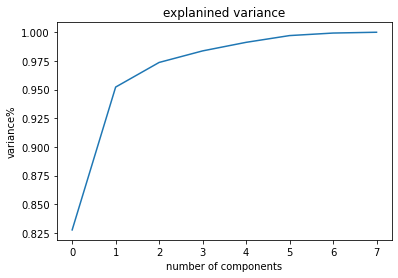

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
p_components=pca.fit_transform(df_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance%")
plt.title("explanined variance")
plt.show()

conclusion:: We can see that approx 98% of the variance is explained by 5 components so instead of passing all the 8 components in model lets use only 5.

In [13]:
pca=PCA(n_components=5)
new_data=pca.fit_transform(df_x)
principle_x=pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5'])
principle_x

,PC1,PC2,PC3,PC4,PC5
0,-1.857581,-1.087182,0.479328,-0.166340,-0.108747
1,-3.615985,-1.028358,-0.032115,0.035869,-0.043979
2,-0.374976,1.325475,-0.033461,-0.264366,0.063905
3,-1.571936,-1.084145,-0.201220,0.060730,-0.065703
4,-3.891281,0.113599,0.132860,0.049693,-0.035658
...,...,...,...,...,...
4079,1.057930,1.286824,-0.291297,0.239155,-0.084524
4080,0.869109,-1.167425,0.509907,0.025947,-0.109114
4081,2.485833,-1.192065,-0.958852,0.608019,0.148607
4082,1.949194,1.243238,0.557808,0.059154,0.040823


## Train test split

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(principle_x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 15

Train Accuracy-  50.5

Test Accuracy-  50.5


At random state: 126

Train Accuracy-  50.5

Test Accuracy-  50.5


At random state: 137

Train Accuracy-  50.5

Test Accuracy-  50.5


At random state: 251

Train Accuracy-  50.5

Test Accuracy-  50.5


At random state: 450

Train Accuracy-  50.4

Test Accuracy-  50.4


 Best accuracy at random state- 15


## Applying Linear Regression model

In [34]:
x_train,x_test,y_train,y_test=train_test_split(principle_x,y,random_state=15,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(r2_score(y_train,pred_train)*100,1)
test_accuracy=round(r2_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 50.5

test accuracy- 50.5


## Cross validation score

In [35]:

for i in range(4,30):
    cv_score=cross_val_score(lr,principle_x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 38.47674622470218

 Accuracy score is- 50.5


At cv- 5

 cross validation score is- 38.25356225663966

 Accuracy score is- 50.5


At cv- 6

 cross validation score is- 38.10906938565964

 Accuracy score is- 50.5


At cv- 7

 cross validation score is- 40.5874529636301

 Accuracy score is- 50.5


At cv- 8

 cross validation score is- 34.009241227920754

 Accuracy score is- 50.5


At cv- 9

 cross validation score is- 38.335609066485866

 Accuracy score is- 50.5


At cv- 10

 cross validation score is- 32.36998351750315

 Accuracy score is- 50.5


At cv- 11

 cross validation score is- 33.72468682558928

 Accuracy score is- 50.5


At cv- 12

 cross validation score is- 33.57627162708134

 Accuracy score is- 50.5


At cv- 13

 cross validation score is- 31.439440363317207

 Accuracy score is- 50.5


At cv- 14

 cross validation score is- 34.63899375105572

 Accuracy score is- 50.5


At cv- 15

 cross validation score is- 31.740915339083898

 Accurac

So we are getting the least difference between cross_val_score and accuracy score at cv=7

In [245]:
cv_score_best=cross_val_score(lr,principle_x,y,cv=7).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_accuracy)

cross validation score is- 40.58745296363011
accuracy score for logistic regression model is- 50.5


## Support Vector Regression


In [16]:
from sklearn import svm

In [29]:
sm=svm.SVR()
sm.fit(x_train,y_train)

SVR()

In [30]:
sm_pred_train=sm.predict(x_train)
sm_pred_test=sm.predict(x_test)

In [31]:
sm_acc_train=r2_score(y_train,sm_pred_train)
sm_acc_test=r2_score(y_test,sm_pred_test)
print("acc train",sm_acc_train*100)
print("acc test",sm_acc_test*100)

acc train 52.2243711666742
acc test 51.218986982094215


## Cross validation score

In [36]:
for i in range(4,15):
    cv_score=cross_val_score(sm,principle_x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",sm_acc_test*100)



At cv- 4

 cross validation score is- 46.617264491799574

 Accuracy score is- 51.218986982094215


At cv- 5

 cross validation score is- 45.983463366563015

 Accuracy score is- 51.218986982094215


At cv- 6

 cross validation score is- 46.85571056512272

 Accuracy score is- 51.218986982094215


At cv- 7

 cross validation score is- 47.58292877722658

 Accuracy score is- 51.218986982094215


At cv- 8

 cross validation score is- 45.61100611590994

 Accuracy score is- 51.218986982094215


At cv- 9

 cross validation score is- 46.883323760166256

 Accuracy score is- 51.218986982094215


At cv- 10

 cross validation score is- 44.10287882168433

 Accuracy score is- 51.218986982094215


At cv- 11

 cross validation score is- 45.17978120016798

 Accuracy score is- 51.218986982094215


At cv- 12

 cross validation score is- 46.28748150499386

 Accuracy score is- 51.218986982094215


At cv- 13

 cross validation score is- 43.95927612766786

 Accuracy score is- 51.218986982094215


At cv- 14



So we are getting the least difference between cross_val_score and accuracy score at cv=7

In [37]:
cv_score_best=cross_val_score(sm,principle_x,y,cv=7).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for support vector regressor model is-",sm_acc_test*100)

cross validation score is- 47.58292877722658
accuracy score for support vector regressor model is- 51.218986982094215


## Random Forest Regression

In [251]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
rf=RandomForestRegressor()


In [232]:
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(principle_x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  93.3

Test Accuracy-  48.5


At random state: 1

Train Accuracy-  93.2

Test Accuracy-  52.4


At random state: 2

Train Accuracy-  93.4

Test Accuracy-  47.2


At random state: 3

Train Accuracy-  93.3

Test Accuracy-  50.4


At random state: 4

Train Accuracy-  93.1

Test Accuracy-  52.3


At random state: 5

Train Accuracy-  93.1

Test Accuracy-  50.2


At random state: 6

Train Accuracy-  93.0

Test Accuracy-  52.5


At random state: 7

Train Accuracy-  93.1

Test Accuracy-  50.2


At random state: 8

Train Accuracy-  93.1

Test Accuracy-  50.8


At random state: 9

Train Accuracy-  93.2

Test Accuracy-  45.9


At random state: 10

Train Accuracy-  93.3

Test Accuracy-  50.9


At random state: 11

Train Accuracy-  93.0

Test Accuracy-  54.6


At random state: 12

Train Accuracy-  93.1

Test Accuracy-  52.1


At random state: 13

Train Accuracy-  93.1

Test Accuracy-  50.2


At random state: 14

Train Accuracy-  93.1

Test Accuracy-  50.2


At 

In [237]:
x_train,x_test,y_train,y_test=train_test_split(principle_x,y,random_state=11,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_acc_train=round(r2_score(y_train,pred_train)*100,1)
rf_acc_test=round(r2_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",rf_acc_train)
print("\ntest accuracy-",rf_acc_test)


train accuracy- 93.0

test accuracy- 55.1


## Cross validation score

In [253]:
for i in range(4,15):
    cv_score=cross_val_score(rf,principle_x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",rf_acc_test)



At cv- 4

 cross validation score is- 40.26223693774696

 Accuracy score is- 5510.0


At cv- 5

 cross validation score is- 41.09049154905242

 Accuracy score is- 5510.0


At cv- 6

 cross validation score is- 40.83245603085543

 Accuracy score is- 5510.0


At cv- 7

 cross validation score is- 43.28500530173161

 Accuracy score is- 5510.0


At cv- 8

 cross validation score is- 37.45822836475205

 Accuracy score is- 5510.0


At cv- 9

 cross validation score is- 41.0069900512812

 Accuracy score is- 5510.0


At cv- 10

 cross validation score is- 35.52849483538717

 Accuracy score is- 5510.0


At cv- 11

 cross validation score is- 37.377640852874414

 Accuracy score is- 5510.0


At cv- 12

 cross validation score is- 37.97246831545262

 Accuracy score is- 5510.0


At cv- 13

 cross validation score is- 33.98829008132612

 Accuracy score is- 5510.0


At cv- 14

 cross validation score is- 38.315524802060786

 Accuracy score is- 5510.0


So we are getting the least difference between cross_val_score and accuracy score at cv=7

In [254]:
cv_score_best=cross_val_score(rf,principle_x,y,cv=7).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for random forest regressor model is-",rf_acc_test)

cross validation score is- 43.827051871450266
accuracy score for support vector classifier model is- 55.1


Looking at the above models the best performing model is support vector regressor model so now we will try to improve accuracy by hyperparameter tuning.

## Hyperparameter Tuning on SVR

In [40]:
from sklearn.model_selection import GridSearchCV


In [41]:
param_grid={'kernel':['rbf','sigmoid'],
           'C':[0.1,1.0,10],
           'gamma':[0.01,0.1,1.0]}

In [ ]:
gridsearch=GridSearchCV(sm,param_grid)
gridsearch.fit(x_train,y_train)

In [ ]:
gridsearch.best_params_

In [ ]:
sm=svm.SVR(kernel='rbf',C=1,gamma=1.0)
sm.fit(x_train,y_train)

In [36]:
sm_pred_train=sm.predict(x_train)
sm_pred_test=sm.predict(x_test)

In [ ]:
sm_acc_train=r2_score(y_train,sm_pred_train)
sm_acc_test=r2_score(y_test,sm_pred_test)
print("acc train",sm_acc_train*100)
print("acc test",sm_acc_test*100)

## Cross Validation score

In [ ]:
for i in range(4,15):
    cv_score=cross_val_score(sm,principle_x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",sm_acc_test*100)

So we are getting the least difference between cross_val_score and accuracy score at cv=7

In [ ]:
cv_score_best=cross_val_score(sm,principle_x,y,cv=7).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for support vector regressor model is-",sm_acc_test*100)

## Model Saving

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(sm, open(filename, 'wb'))
 